# Neural Networks

In [1]:
import sympy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

Neural network: multilayered regression containing layers of weights, biases, and nonlinear functions

Deep learning: neural network with multiple middle layers of nodes (not just input, single middle, and output)

Use optimization techniques to find optimal weights & biases

Neural networks are best for perceptual problems like image classification or decyphering audio words <br>
Regressions & trees are better for structured data

Different types of neural networks:
- Convolutional neural network (CNN): image recognition
- Long short term memory (LSTM): for predicting time series or forecasting
- Recurrent neural networks (RNN): text-to-speech applications

Use simpler models when possible <br>
Use complex models on simple problems only to illustrate fundamentals of complex models

Layers of a neural network:

First layer: input variables

Middle layer: weights & biases multiplied and summed with input variables
- weights between nodes
- biases added to each node

Final layer: output
- multiply hidden layer outputs by weights and biases
- minimize loss using objective function
- backpropagate to affect weights & biases in previous layers

Activation function: non-linear function that transforms node values and determines if a value should be passed or "activated" to the next nodes.

Rectified Linear Unit (ReLU): Activation function that passes positive inputs and zeroes negative inputs
- "Rectifies" negatives to zero
- Speedy
- mitigates vanishing gradient problem

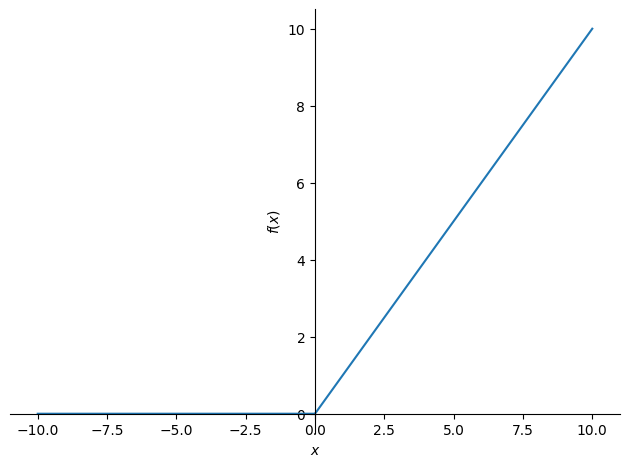

In [2]:
# plot relu
x = sympy.symbols('x')
relu = sympy.Max(0, x)
sympy.plot(relu);

Vanishing gradients: partial derivative slopes get so small that they prematurely approach zero and halt training (also affected by *floating point underflow* in computers).

Common activation functions:

Linear: leaves values as is
- Not commonly used

Logistic: sigmoid curve
- Assists in binary classification

Tangent Hyperbolic (tanh): sigmoid curve between -1 and 1
- "Centers" data by bringing mean close to zero

ReLU: turns negative values to zero
- faster than sigmoid and tanh
- mitigates vanishing gradient
- computationally cheap

Leaky ReLU: multplies negative values by 0.01
- Controversial variant that marginalizes rather than eliminates negative values

Softmax: All output nodes add up to 1
- useful for multiple-classification and rescaling outputs

ReLU is the gold standard for middle layers, sigmoid and softmax often used for outputs

Weights matrices have 1 weight per incoming connection <br>
Biases have 1 value per node in the layer (# rows = # columns)

Each iteration of updating weights & biases requires a forward pass (forward propagation) and a backward pass (backward propagation)

Forward propagation is simple: multiply matrix X by weights matrix, add bias, run this result through the activation function, and repeat until output is reached

Feed forward (forward propagation): inputting into a neural network and seeing what it outputs
- weights and biases are initially randomized between 0 and 1
- weights and biases not affected yet

In [3]:
# feed forward (forward propagation)

# get input and output variables
data = pd.read_csv("https://tinyurl.com/y2qmhfsr")
inputs = data.iloc[:, 0:3].values / 255
outputs = data.iloc[:, -1].values

# train test split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=1/3)
n = X_train.shape[0] # number of training records

# random weights and biases
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)
b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# activation functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# forward propagation
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print('Accuracy: ', accuracy)

Accuracy:  0.5968819599109126


Backpropagation: minimize loss (or optimize objective function), then using derivates to pass back values to affect weights & biases

Objective function:

$ C = (\hat{y} - y)^2 $, where

$C$ is the cost of a single prediction, <br>
$ \hat{y} $ is the prediction, and <br>
$y$ is the true output

Like in gradient descent, values to affect the weights and biases are the partial derivatives, but with multiple layers, we need to use the chain rule:

$ {d(\text{output}) \over d(\text{previous weight or bias})} = {dC \over dW_1} = {dC \over dA_2} * {dA_2 \over dZ_2} * {dZ_2 \over dA_1} * {dA_1 \over dZ_1} * {dZ_1 \over dW_1} $, where

$A$ functions are activated functions, and <br>
$Z$ functions are non-activated weight-and-bias functions

In [4]:
# manual neural network

# get input and output variables
data = pd.read_csv("https://tinyurl.com/y2qmhfsr")
inputs = data.iloc[:, 0:3].values / 255
outputs = data.iloc[:, -1].values

# train test split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=1/3)
n = X_train.shape[0] # number of training records

# random weights and biases
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)
b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# activation functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# forward propagation
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# activation derivatives
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# backpropagation
def backward_prop(Z1, A1, Z2, A2, X, y):
    dC_dA2 = 2*A2 - 2*y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# define learning rate and iterations
L = 0.05
I = 100_000

# execute stochastic gradient descent
for i in range(I):
    # random selection of training data
    idx = np.random.choice(n, 1, replace= False)
    X_sample = X_train[idx].transpose()
    y_sample = y_train[idx]
    
    # forward propagation of training data
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # backpropagation of training data
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, y_sample)

    # update weights and biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only A2
test_comparisons = np.equal((test_predictions >= 0.5).flatten().astype(int), y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print('Accuracy: ', accuracy)

Accuracy:  0.9933184855233778


Getting predictions is just forward propagation on the trained neural network.

In [5]:
# sklearn neural network

# get input and output variables
data = pd.read_csv("https://tinyurl.com/y2qmhfsr")
inputs = data.iloc[:, 0:3].values / 255
outputs = data.iloc[:, -1].values

# train test split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=1/3)

# create and fit neural network
nn = MLPClassifier(
    solver= 'sgd',
    hidden_layer_sizes= (3, ),
    activation= 'relu',
    max_iter= 100_000,
    learning_rate_init= 0.05
)
nn.fit(X_train, y_train)

# print weights and biases
print(nn.coefs_)
print(nn.intercepts_)

# print accuracy
print('Training set score: %f' % nn.score(X_train, y_train))
print('Testing set score: %f' % nn.score(X_test, y_test))

[array([[-0.44936692,  0.21100871,  3.35482374],
       [ 0.71090864, -0.48533219,  6.90085666],
       [-0.55139815, -0.96121742,  1.27177956]]), array([[ 0.96139465],
       [-1.02011679],
       [ 9.22828936]])]
[array([-0.57168729, -0.73549155, -5.12601893]), array([-5.78731936])]
Training set score: 1.000000
Testing set score: 1.000000


Neural networks have limitations
- can overfit
- does not generalize to different conditions

Use neural networks in tandem with other algorithms for complex tasks.

The real world is filled with infinite unpredictability and rare events.

Machine learning, neural networks, and deep learning all work narrowly on defined problems. They cannot broadly reason or choose their own tasks!

Choose the tool **for** the job, not the tool **and then** the job!